### 1. Load data

In [ ]:
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras import datasets, layers, models, regularizers, callbacks
from utils.imagepreprocessing import ImagePreprocessing

In [ ]:
ds_size = 3670
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
img_preproc = ImagePreprocessing(ds_size, batch_size, img_height, img_width)

In [ ]:
img_preproc.import_data()

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Found 3670 files belonging to 5 classes.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
class_names = img_preproc.get_class_names()

In [ ]:
train_ds, val_ds = img_preproc.get_train_val_ds()

In [ ]:
print(f"Rozmiar train_ds {tf.data.experimental.cardinality(train_ds)}")
print(f"Rozmiar val_ds {tf.data.experimental.cardinality(val_ds)}")

Rozmiar train_ds 92
Rozmiar val_ds 23


In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [ ]:
val_ds.element_spec

(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

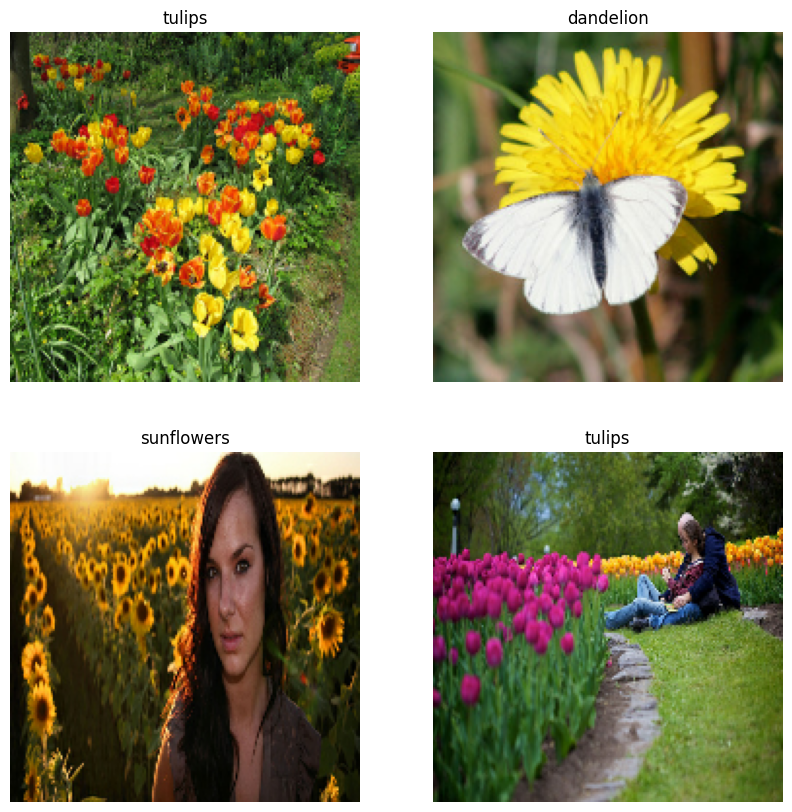

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### 2. Building model

In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    restore_best_weights=True,
    min_delta=0.001
)

In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         331,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,733 (1.52 MB)

 Trainable params: 397,733 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
  callbacks=[early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.2639 - loss: 1.7015 - val_accuracy: 0.4632 - val_loss: 1.3137
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.4788 - loss: 1.2619 - val_accuracy: 0.5341 - val_loss: 1.1576
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.5433 - loss: 1.1476 - val_accuracy: 0.5804 - val_loss: 1.0759
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.5933 - loss: 1.0539 - val_accuracy: 0.5995 - val_loss: 1.0008
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.6262 - loss: 0.9742 - val_accuracy: 0.6131 - val_loss: 0.9637
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.6633 - loss: 0.9200 - val_accuracy: 0.6499 - val_loss: 0.8876
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.6884 - loss: 0.8365 - val_accuracy: 0.7193 - val_loss: 0.7704
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.7232 - loss: 0.7678 - val_accuracy: 0.7357 - val_l

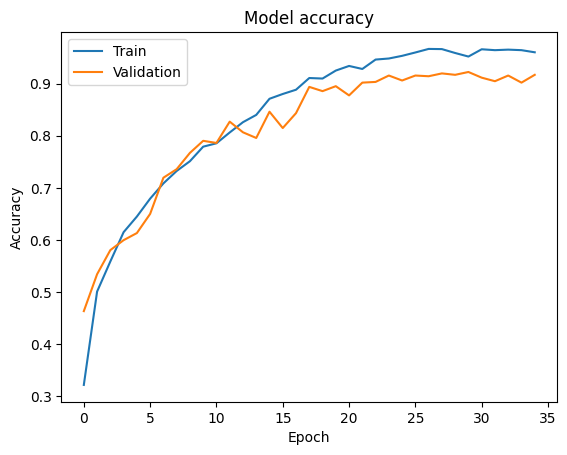

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

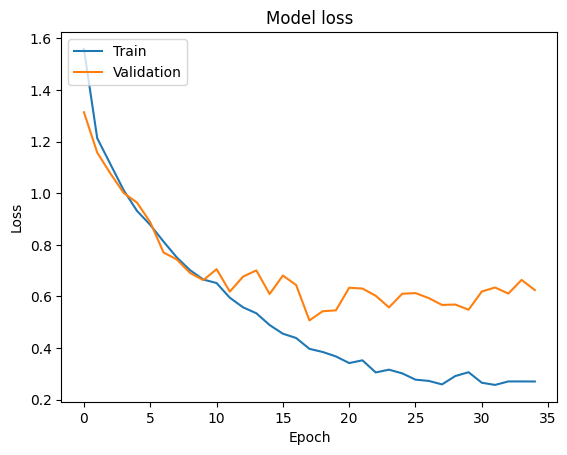

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('models/flowers.keras', overwrite=True)